## 1. Mini Case

### 1.1. 실습 데이터

#### 1.1.1. 실습 데이터 파일

학습 데이터 파일 명 : TrainingSet.csv  
학습 데이터 파일 포맷 : .csv  

>실습을 위한 데이터는 임의의 데이터를 사용하여 구현하였으며, 다음과 같은 컬럼으로 구성되어 있습니다.  

#### 1.1.2. 열 교환기
- 대기온도 : TEMP  
- 입력 유량 : HE_IN_INFL  
  입력 온도 : HE_IN_TEMP  
  입력 압력 : HE_IN_PRES  
- 출력 유량 : HE_OUT_INFL  
  출력 온도 : HE_OUT_TEMP  
  출력 압력 : HE_OUT_PRES  
- 라벨 데이터 : HE_LABL (0 : 정상 상태, 1 : 비정상 상태)

## 2. 데이터 전처리

### 2.1. 데이터 읽어들이기

본 수업에서는 주어진 데이터를 Pandas를 활용하여 데이터를 읽어들이고, 데이터의 특성을 이해하기 위한 탐색적 데이터 분석을 수행합니다.  
파이썬을 사용하여 프로그래밍을 할 수 있도록, 다음과 같이 라이브러리를 import 합니다.  

1. 분석을 위한 라이브러리
    - numpy : 수학적 계산을 위해 사용되는 라이브러리
    - pandas : 데이터 분석을 위해 사용되는 라이브러리
    - scipy : 공학적 계산을 위해 사용되는 라이브러리
    - sklearn(scikit-learn) : 기계학습을 위해 사용되는 라이브러리
    
    
2. 시각화를 위한 라이브러리
    - matplotlib : 데이터 시각화를 위해 사용되는 라이브러리
    - seaborn : 데이터 시각화를 위해 사용되는 라이브러리
    
> 본 수업에서는 다양한 패키지와 모듈을 import 합니다.  
어떤 패키지에서 어떤 모듈을 import 하는지 확실하게 이해할 수 있도록 합니다.

In [94]:
# 공통 사용 패키지 import
import numpy as np # numpy 패키지를 축약어 np로 import 합니다.
import matplotlib as mpl # matplotlib 패키지를 축약어 mpl로 import 합니다.
import matplotlib.pyplot as plt # matplotlib 패키지의 pyplot 모듈을 축약어 plt로 import 합니다.
import pandas as pd # pandas 패키지를 축약어 pd로 import 합니다.
import scipy as sp # scipy 패키지를 축약어 sp로 import 합니다.
from scipy.stats import boxcox, boxcox_normplot # scipy 패키지의 stats라는 모듈 중 boxcox, boxcox_normplot 함수를 import 합니다.
import seaborn as sns # seaborn 패키지를 축약어 sns로 import 합니다.
from sklearn.preprocessing import MinMaxScaler # sklearn 패키지의 preprocessing 모듈 중 MinMaxScaler 함수를 import 합니다.
import statsmodels.api as sm # statsmodels 패키지의 api 모듈을 sm으로 import 합니다.

# 선형회귀모델 관련 패키지 import
from sklearn.linear_model import LinearRegression # sklearn 패키지의 linear_model 모듈 중 LinearRegression 함수를 import 합니다.
from statsmodels.stats.outliers_influence import variance_inflation_factor # statsmodels 패키지의 stats 모듈 중 variance_inflation_factor 함수를 import 합니다.
from statsmodels.stats.stattools import durbin_watson # statsmodels 패키지의 stats 모듈 중 durbin_watson 함수를 import 합니다.

# 의사결정트리모델 관련 패키지 import
import graphviz # graphviz 패키지를 import 합니다.
import pydotplus # pydotplus 패키지를 import 합니다.
from sklearn.tree import DecisionTreeClassifier # sklearn 패키지의 tree 모듈 중 DecisionTreeClassifier 함수를 import 합니다.
from sklearn.tree import export_graphviz # sklearn 패키지의 tree 모듈 중 export_graphviz 함수를 import 합니다.

데이터의 분석 및 활용을 위하여, 먼저 Pandas의 read_csv 함수를 활용하여 데이터를 불러들입니다.  
본 수업에 앞서 전달드린 실습 파일을 읽어보도록 하겠습니다.

In [5]:
# 실습 데이터 파일 위치 지정
trainpath = './SampleDataSet/TrainingSet.csv'
# 경로의 제일 앞에 있는 점(.)은 현재 2일차_교육.ipynb 파일이 존재하는 디렉터리를 나타냅니다.
# 즉, 데이터 세트는 가장 현재 디렉터리의 SampleDataSet 디렉터리 안에 존재한다는 것을 나타냅니다.

# 실습 데이터 읽기
hetraindata = pd.read_csv(trainpath)
hetraindata.head()

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES,HE_LABL
0,16.660,560.000000,638.620000,14.0060,17.47,16.319500,18.940300,0
1,16.970,561.499066,635.055000,14.0314,17.49,16.325650,18.940250,0
2,17.120,564.632023,634.446667,14.0420,17.27,16.323033,18.940300,0
3,17.305,563.881555,634.292500,14.0187,17.13,16.309325,18.940362,0
4,17.282,564.587366,634.194000,14.0622,17.28,16.313340,18.940350,0


### 2.2. 데이터 살펴보기

#### 2.2.1. 각 변수의 자료형 확인

읽어온 데이터의 자료형을 출력하여 각 컬럼 별로 어떤 데이터 자료형을 가지고 있는지 확인합니다.  

In [6]:
# dtypes
hetraindata.dtypes

TEMP           float64
HE_IN_INFL     float64
HE_OUT_INFL    float64
HE_IN_TEMP     float64
HE_OUT_TEMP    float64
HE_IN_PRES     float64
HE_OUT_PRES    float64
HE_LABL          int64
dtype: object

#### 2.2.2. describe 함수를 사용한 데이터 확인
 
describe 함수를 사용하여 읽어온 파일을 출력하여, 어떤 데이터인지 확인합니다.

In [7]:
# DESCRIBE
hetraindata.describe()

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES,HE_LABL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,16.434437,563.946680,643.460137,14.089338,17.541168,16.341132,18.940474,0.150259
std,0.669201,1.513374,18.072103,0.090006,0.267087,0.032072,0.000320,0.357334
min,14.224000,560.000000,603.466000,13.822500,16.850000,16.230300,18.939600,0.000000
25%,16.046000,562.884196,633.375000,14.023600,17.350000,16.316830,18.940230,0.000000
50%,16.488000,563.824288,640.468000,14.080400,17.510000,16.337720,18.940460,0.000000
75%,16.944000,564.899879,647.797000,14.145550,17.700000,16.359970,18.940670,0.000000
max,17.970000,572.694602,781.152000,14.414900,18.530000,16.442420,18.941630,1.000000


#### 2.2.3. 시각화를 통한 데이터 확인
 
시각화를 통해 데이터 분포를 확인합니다.

<AxesSubplot:>

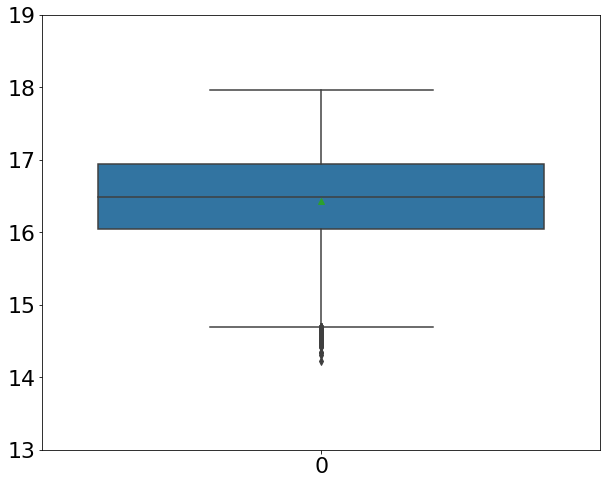

In [8]:
# box-plot
figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
plt.ylim(13, 19)
sns.boxplot(data=hetraindata['TEMP'], showmeans=True)

In [22]:
# # 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도
# sns.pairplot(hetraindata)
# plt.show()

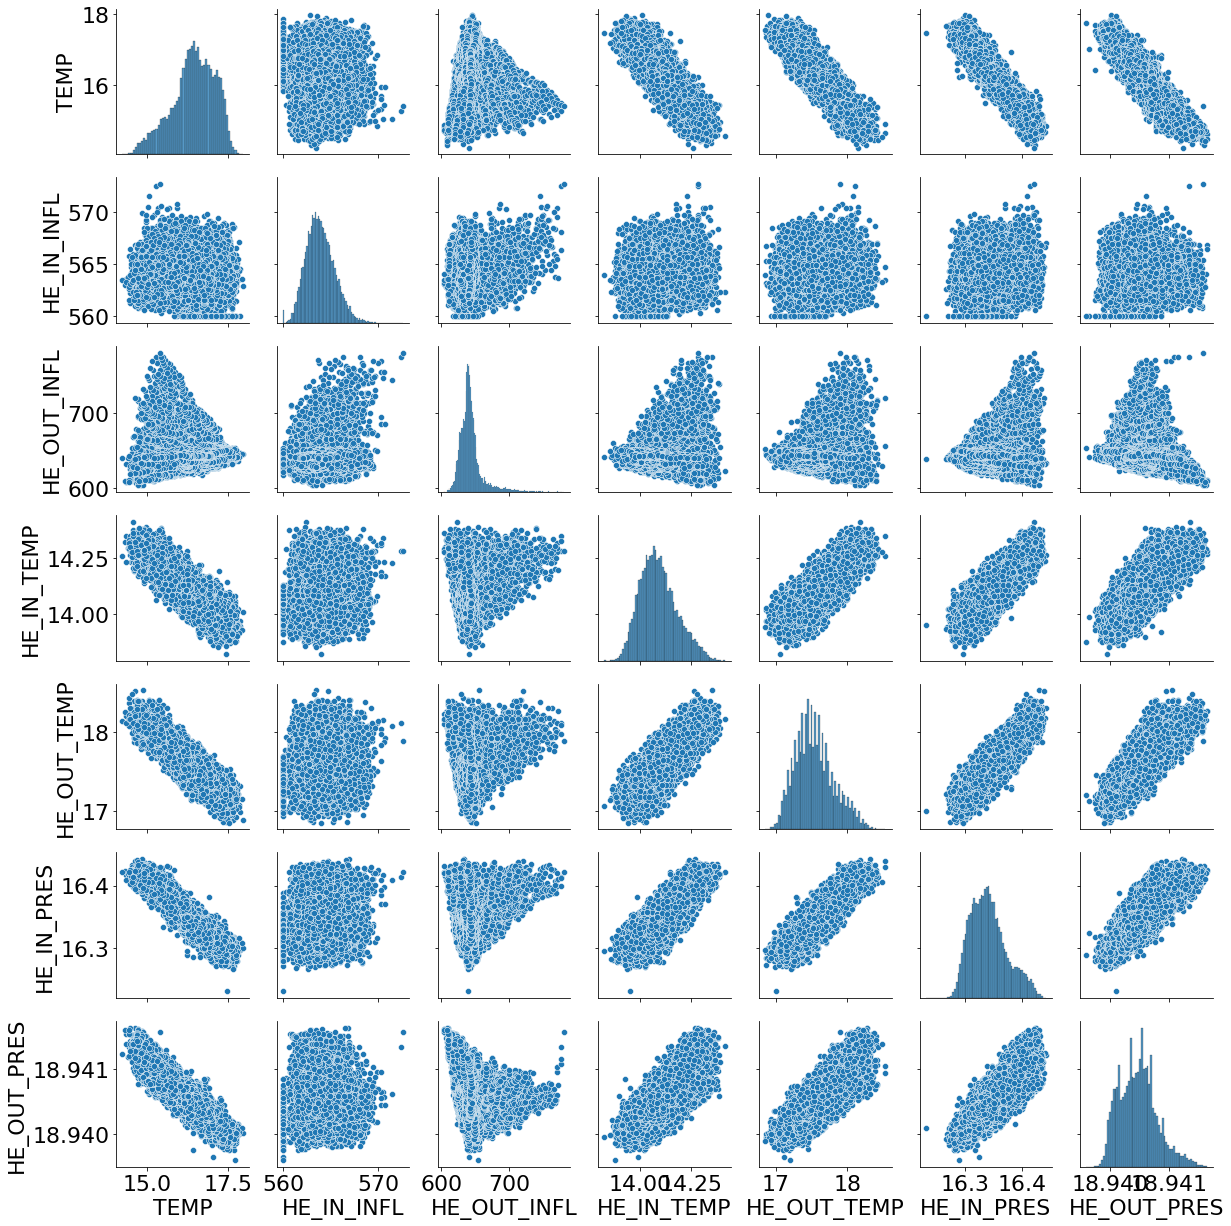

In [97]:
# 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도
sns.pairplot(data=hetraindata, vars=['TEMP','HE_IN_INFL','HE_OUT_INFL','HE_IN_TEMP','HE_OUT_TEMP','HE_IN_PRES','HE_OUT_PRES'])
plt.show()

위 히스토그램를 보았을 때, 대부분의 컬럼은 정규분포에 가까운 모습을 보입니다.  
하지만 각 컬럼의 단위가 다르며, 'HE_IN_INFL', 'HE_OUT_INFL' 컬럼의 경우 한쪽으로 데이터가 몰려있는 형태인 것을 확인할 수 있습니다.  

#### 2.2.4. 데이터 변환

이러한 데이터 세트를 사용하여 분석을 할 경우, 변수들 간의 상대적인 크기로 인하여 분석결과가 달라질 수 있습니다.  
데이터 세트에 대해서 정규화를 수행하고 왜도가 치우쳐진 컬럼을 추려내어 확인해보도록 하겠습니다.
> HE_LABL 컬럼의 경우, 라벨데이터로써 정규화를 수행하지 않습니다.

In [23]:
# 최소-최대 정규화
# 정규화의 범위를 1e-10부터 1까지로 설정합니다.
scaler = MinMaxScaler(feature_range=(1e-10, 1))

In [24]:
# 트레이닝 세트 최소-최대 정규화 변환 
nolabel = hetraindata.drop(['HE_LABL'], axis=1).copy()

scaleddata = scaler.fit_transform(nolabel)
scaleddata = pd.DataFrame(scaleddata, columns=nolabel.columns)
scaleddata.head()

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES
0,0.650294,1.000018e-10,0.197843,0.309757,0.369048,0.420517,0.344828
1,0.733049,1.180869e-01,0.177780,0.352633,0.380952,0.449510,0.320197
2,0.773091,3.648813e-01,0.174356,0.370527,0.250000,0.437174,0.344828
3,0.822477,3.057642e-01,0.173489,0.331195,0.166667,0.372549,0.375616
4,0.816337,3.613635e-01,0.172934,0.404625,0.255952,0.391477,0.369458


head 함수를 사용하여 데이터를 출력하였을 때, 1e-10~1사이의 값을 가지는것을 확인할 수 있습니다.  
이어서, 데이터가 한쪽으로 몰려있던 'HE_IN_INFL', 'HE_OUT_INFL' 컬럼을 히스토그램을 통해 확인해보도록 하겠습니다.

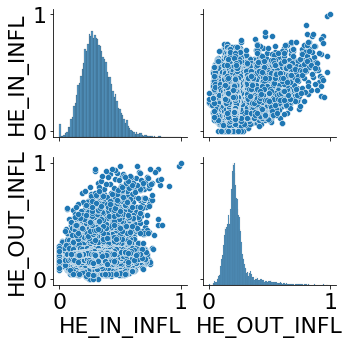

In [25]:
# 'HE_IN_INFL', 'HE_OUT_INFL' 컬럼 추출
tempcol = scaleddata.loc[:, ['HE_IN_INFL', 'HE_OUT_INFL']].copy()

# 트레이닝 세트의 히스토그램 표출
sns.pairplot(tempcol)
plt.show()

한쪽으로 몰려있는 데이터를 변환하기 위하여 각 변수에 대해 Box-Cox 변환을 수행하도록 하겠습니다.  
각 변수의 값은 모두 양수이므로(0보다 크므로) 따로 0값을 보정하지 않고 Box-Cox 변환하도록 하겠습니다.

In [26]:
# Scipy 패키지의 Box-Cox 변환 함수를 사용하여 'HE_IN_INFL' 컬럼을 변환합니다.
bct = boxcox(scaleddata['HE_IN_INFL'], lmbda=0.55)
scaleddata['HE_IN_INFL'] = bct

C:\Users\ninoy\.conda\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


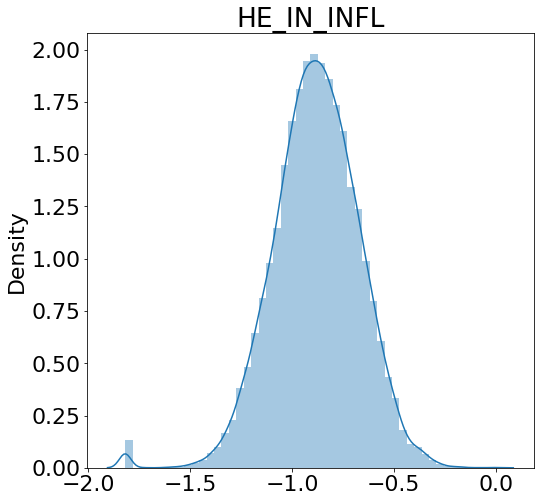

In [27]:
# 변환된 컬럼을 확인합니다.
plt.figure(figsize=(8,8))
sns.distplot(scaleddata[['HE_IN_INFL']])
plt.title('HE_IN_INFL')
plt.show()

In [28]:
# Scipy 패키지의 Box-Cox 변환 함수를 사용하여 'HE_OUT_INFL' 컬럼을 변환합니다.
bct = boxcox(scaleddata['HE_OUT_INFL'], lmbda=0.4)
scaleddata['HE_OUT_INFL'] = bct

C:\Users\ninoy\.conda\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


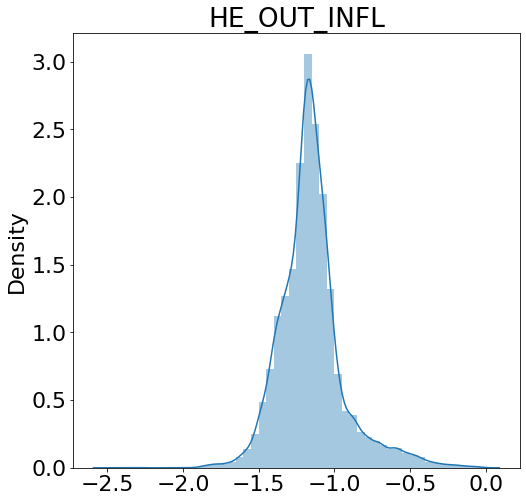

In [29]:
# 변환된 컬럼을 확인합니다.
plt.figure(figsize=(8,8))
sns.distplot(scaleddata[['HE_OUT_INFL']])
plt.title('HE_OUT_INFL')
plt.show()

Box-Cox 변환을 사용하여 왜도가 있는 변수들을 변환하였으므로, 다음과 같이 다시 히스토그램을 표출해서 확인해보겠습니다.

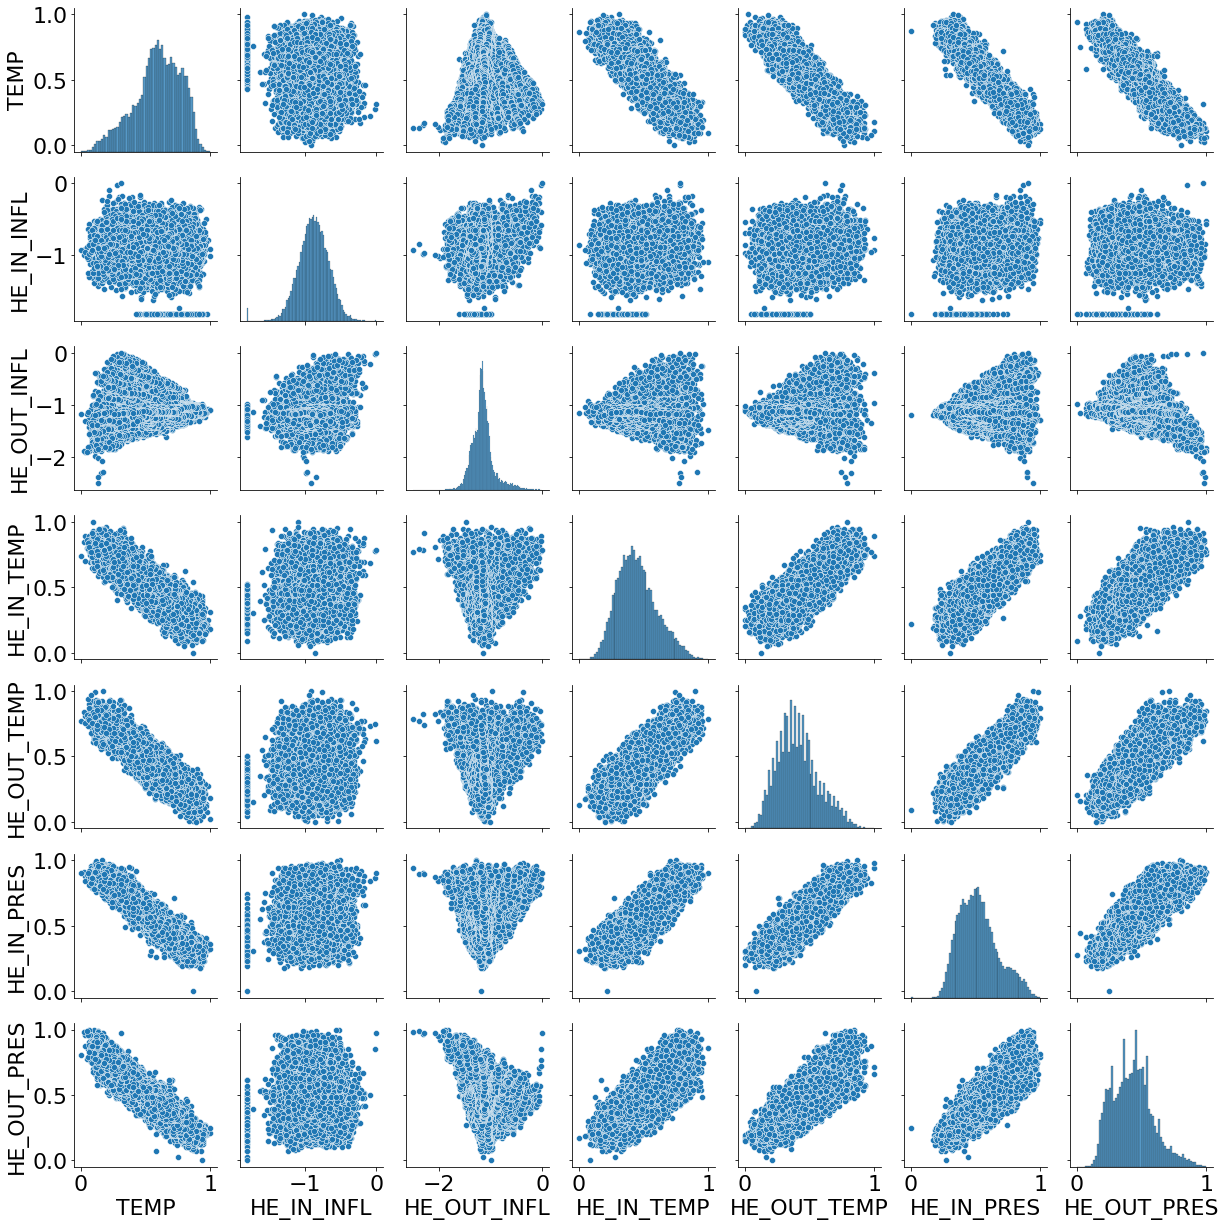

In [30]:
# hist를 사용하여 데이터의 분포를 확인합니다.
sns.pairplot(scaleddata)
plt.show()

## 3. 선형회귀모델(Linear Regression)

위에서 정의한 열교환기 데이터 세트를 활용하여 선형회귀모델을 구현해보도록 하겠습니다.  
선형회귀모델을 구현하기 위해서는 Scikit-Learn을 활용한 LinearRegrssion 함수를 사용합니다.

### 3.1. 열교환기 데이터 세트 준비

이를 위해서 먼저 독립변수와 종속변수를 각각 정하여 해당하는 변수를 선정하도록 하겠습니다.  
본 수업에서는 열교환기의 입력 압력을 독립변수로, 출력 압력을 종속변수로 선정하여 선형회귀모델을 수행합니다.  

- 대기온도 : TEMP  
  입력 유량 : HE_IN_INFL  
  입력 온도 : HE_IN_TEMP  
  입력 압력 : HE_IN_PRES  
  출력 유량 : HE_OUT_INFL  
  출력 온도 : HE_OUT_TEMP  
  출력 압력 : HE_OUT_PRES  

- 독립변수, X 변수, Feature : 대기온도, 입력 유량, 입력 온도, 입력 압력, 출력 유량, 출력 온도
- 종속변수, Y 변수, Target : 출력 압력

### 3.2. Scikit-Learn의 LinearRegression

#### 3.2.1. 학습 및 검증 데이터 분리

위와 같이 정규화 및 변환이 완료된 데이터 세트를 사용하여 독립변수, 종속변수를 각각 정한 뒤, 학습 데이터와 검증 데이터로 나누도록 하겠습니다.  

In [48]:
# 분석을 위한 데이터 선언
# 독립변수
datax = scaleddata.loc[:, scaleddata.columns != 'HE_OUT_PRES'].copy()

# 종속변수
datay = scaleddata.loc[:, 'HE_OUT_PRES'].copy()

In [49]:
# # 분석을 위한 데이터 선언
# # 독립변수
# datax = hetraindata[hetraindata.columns.difference(['HE_OUT_PRES','HE_LABL'])]

# # 종속변수
# datay = hetraindata.loc[:, 'HE_OUT_PRES'].copy()

독립변수와 종속변수를 선정한 뒤, Scikit-Learn의 train_test_split 함수를 사용하여 다음과 같이 학습 데이터와 검증 데이터로 분리합니다.

***sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=None, shuffle=True)***

train_test_split 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  
- X : 독립변수
- y : 종속변수
- test_size : 검증 데이터로 분리할 비율
- random_state : 랜덤 값을 특정값으로 고정
- shuffle : 학습 데이터와 검증 데이터로 분리 시, 임의 추출 여부

In [50]:
# 전처리 함수 import
from sklearn.model_selection import train_test_split # scikit-learn 패키지의 model_selection 모듈 중 train_test_split 함수를 import 합니다.

# 학습 및 검증데이터 분리
trainx, validx, trainy, validy = train_test_split(datax, datay, test_size=0.3, random_state=42)

In [51]:
# 학습데이터의 각 변수 별 기초 통계량 확인
pd.concat([trainx.describe(), trainy.describe()], axis=1)

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES
count,1.444100e+04,14441.000000,14441.000000,14441.000000,14441.000000,1.444100e+04,14441.000000
mean,5.885368e-01,-0.881585,-1.148553,0.452231,0.412480,5.240979e-01,0.431854
std,1.792608e-01,0.210169,0.221911,0.152667,0.159893,1.518941e-01,0.158422
min,1.000000e-10,-1.818176,-2.499750,0.068197,0.005952,1.000018e-10,0.024631
25%,4.847838e-01,-1.013609,-1.274634,0.339635,0.297619,4.085423e-01,0.310345
50%,6.027763e-01,-0.878588,-1.165144,0.436529,0.398810,5.073543e-01,0.426931
75%,7.255739e-01,-0.741442,-1.063862,0.548785,0.511905,6.143692e-01,0.527094
max,1.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000


In [52]:
# 검증데이터의 각 변수 별 기초 통계량 확인
pd.concat([validx.describe(), validy.describe()], axis=1)

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES
count,6190.000000,6190.000000,6190.000000,6.190000e+03,6.190000e+03,6190.000000,6.190000e+03
mean,0.593678,-0.880782,-1.154009,4.462456e-01,4.089122e-01,0.518769,4.281920e-01
std,0.177160,0.211607,0.214064,1.501405e-01,1.568159e-01,0.149511,1.560638e-01
min,0.032568,-1.818176,-2.279610,9.999823e-11,1.000000e-10,0.188573,1.000444e-10
25%,0.492258,-1.012516,-1.273405,3.389602e-01,2.916667e-01,0.406303,3.103448e-01
50%,0.607581,-0.877649,-1.166197,4.318028e-01,3.928571e-01,0.503064,4.236453e-01
75%,0.728243,-0.740634,-1.069417,5.388251e-01,5.000000e-01,0.605860,5.221675e-01
max,0.993059,-0.093295,-0.052662,9.390614e-01,9.285714e-01,0.965774,9.753695e-01


이와 같이 분리된 데이터를 사용하여 회귀모델 및 분류모델을 구현해보도록 하겠습니다.  

#### 3.2.2. 선형회귀분석모델 구현

Scikit-Learn의 LinearRegression 함수는 다음과 같은 코드를 사용하여 간단히 구현할 수 있습니다.

***LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)***

LinearRegression 함수에 사용할 수 있는 파라미터는 다음과 같은 기능을 하고있습니다.  
- fit_intercept : 절편계산 여부를 결정
- normalize : 정규화 여부를 결정
- copy_X : 독립변수의 복사여부를 결정
- n_jobs : 컴퓨팅 리소스 사용량 

In [53]:
# 선형회귀분석모델 구현
# 선형회귀분석 클래스 호출
linreg = LinearRegression(fit_intercept=True, n_jobs=-1)

# 선형회귀분석 모델 피팅
linreg.fit(trainx, trainy)

LinearRegression(n_jobs=-1)

In [54]:
# 회귀계수 계산
print (linreg.coef_)

# 절편값 계산
print (linreg.intercept_)

[-0.39133325  0.00282142 -0.24122795  0.09933863  0.13465515  0.29211608]
0.13402812862157937


In [55]:
# 모델의 설명력(R-Square)
print (linreg.score(trainx, trainy))

0.9319551544919498


#### 3.2.3. 선형회귀분석모델 예측

위에서 구현한 선형회귀분석모델에 독립변수를 입력 데이터로 사용함으로써 예측이 가능합니다.  
피팅된 linreg 변수에 predict 함수를 사용하여 예측값을 산출할 수 있습니다.  

In [56]:
# 로지스틱 회귀분석모델 예측값 산출
yhat = linreg.predict(validx)
yhat

array([0.4462156 , 0.83447348, 0.23551215, ..., 0.39321589, 0.3153666 ,
       0.49992146])

#### 3.2.3. 선형회귀분석모델 성능 평가 

In [57]:
# 회귀모델 평가 함수 import
from sklearn.metrics import mean_squared_error, r2_score # scikit-learn 패키지의 metrics 모듈 중 mean_squared_error, r2_score 함수를 import 합니다.
from sklearn.model_selection import train_test_split

##### 3.2.3.1. RMSE(Root Mean Square Error)

RMSE는 평균 제곱근 오차로, 예측값이 실제값으로부터 얼마나 떨어져있는지를 나타내며, 다음 식과 같이 계산할 수 있습니다.  
각 예측값과 실제값의 차이는 잔차(Residual)로, 평균 제곱근 오차는 잔차들을 하나의 측도로 종합할 때 사용됩니다.   

$$RMSE = \sqrt{MSE} = \sqrt{\sum\limits_{i=1}^n ({\frac{\hat{y}_i-y_i}{n})^2}}$$

RMSE는 Scikit-Learn 패키지의 mean_squared_error 함수를 사용하여 계산할 수 있으며, 다음과 같은 코드를 사용하여 계산할 수 있습니다.   

***mean_squared_error(y_true, y_pred, squared=True)***

mean_squared_error 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  

- y_true : 실제값
- y_pred : 예측값
- squared : 평균 오차의 제곱 여부(True: MSE계산, False: RMSE계산)

In [58]:
# mean_squared_error를 사용한 모델 평가
print ('RMSE :', mean_squared_error(y_true=validy, y_pred=yhat, squared=False))

RMSE : 0.04033809324859872


##### 3.2.3.2. R$^2$

R$^2$는 결정계수로 예측값이 실제값을 얼마나 잘 설명하는지를 나타내며 다음 식과 같이 계산할 수 있습니다.  
다음 식을 통해 계산된 결과는 0~1사이의 값으로 나타나며, 0에 가까울수록 모델의 설명력이 낮고, 1에 가까울수록 모델의 설명력이 높다고 해석할 수 있습니다.  
하지만, 분석 모델에 변수가 추가될수록 R$^2$가 1에 가까워지므로 모델의 분석에 주의가 필요합니다.

$$R^2 = \frac{\sum(\hat{y}_i - \bar{y})^2}{\sum(y_i - \bar{y})^2}$$

R$^2$는 Scikit-Learn 패키지의 r2_score 함수를 사용하여 계산할 수 있으며, 다음과 같은 코드를 사용하여 계산할 수 있습니다.   

***r2_score(y_true, y_pred)***

r2_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  

- y_true : 실제값
- y_pred : 예측값

In [59]:
# r2_score 함수를 사용한 모델 평가
print ('R2 :', r2_score(y_true=validy, y_pred=yhat))

R2 : 0.9331815663507581


## 4. 의사결정트리(Decision Tree) 

위에서 정의한 열교환기 데이터 세트를 활용하여 의사결정트리 모델을 만들어보도록 하겠습니다.  
의사결정트리 모델은 Scikit-Learn 패키지를 사용하여 의사결정트리 모델을 구현합니다.

### 4.1. 열교환기 데이터 세트 준비

이를 위해서 먼저 독립변수와 종속변수를 각각 정하여 해당하는 변수를 선정하도록 하겠습니다.  
본 수업에서는 열교환기의 입력 압력을 독립변수로, 라벨 데이터를 종속변수로 선정하여 의사결정트리 모델을 수행합니다.  

- 대기온도 : TEMP  
  입력 유량 : HE_IN_INFL  
  입력 온도 : HE_IN_TEMP  
  입력 압력 : HE_IN_PRES  
  출력 유량 : HE_OUT_INFL  
  출력 온도 : HE_OUT_TEMP  
  출력 압력 : HE_OUT_PRES  
  라벨 데이터 : HE_LABL (0 : 정상 상태, 1 : 비정상 상태)

- 독립변수, X 변수, Feature : 대기온도, 입력 유량, 입력 온도, 입력 압력, 출력 유량, 출력 온도, 출력 압력
- 종속변수, Y 변수, Target : 라벨 데이터 (0 : 정상 상태, 1 : 비정상 상태)

### 4.2. 의사결정트리

#### 4.2.1. 학습 및 검증 데이터 분리

위와 같이 정규화 및 변환이 완료된 데이터 세트를 사용하여 독립변수, 종속변수를 각각 정한 뒤, 학습 데이터와 검증 데이터로 나누도록 하겠습니다.  
본 수업에서는 열교환기의 라벨 데이터를 제외한 변수를 독립변수로, 라벨 데이터를 종속변수로 선정하여 의사결정트리 모델을 수행합니다.  

- 독립변수, X 변수, Feature : 열교환기 
- 종속변수, Y 변수, Target : 열교환기 라벨 데이터

In [60]:
# 분석을 위한 데이터 선언
# 독립변수
datax = hetraindata.loc[:, hetraindata.columns != 'HE_LABL'].copy()

# 종속변수
datay = hetraindata.loc[:, 'HE_LABL'].copy()

In [61]:
# 전처리 함수 import
from sklearn.model_selection import train_test_split # scikit-learn 패키지의 model_selection 모듈 중 train_test_split 함수를 import 합니다.

# 학습 및 검증데이터 분리
trainx, validx, trainy, validy = train_test_split(datax, datay, test_size=0.3, random_state=42)

In [62]:
# 학습데이터의 각 변수 별 기초 통계량 확인
pd.concat([trainx.describe(), trainy.describe()], axis=1)

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES,HE_LABL
count,14441.000000,14441.000000,14441.000000,14441.000000,14441.000000,14441.000000,14441.000000,14441.000000
mean,16.428659,563.944276,643.618905,14.090402,17.542967,16.341472,18.940477,0.154075
std,0.671511,1.511809,18.359591,0.090440,0.268620,0.032220,0.000322,0.361033
min,14.224000,560.000000,603.466000,13.862900,16.860000,16.230300,18.939650,0.000000
25%,16.040000,562.883050,633.352000,14.023700,17.350000,16.316960,18.940230,0.000000
50%,16.482000,563.822536,640.482000,14.081100,17.520000,16.337920,18.940467,0.000000
75%,16.942000,564.897052,647.908000,14.147600,17.710000,16.360620,18.940670,0.000000
max,17.970000,572.694602,781.152000,14.414900,18.530000,16.442420,18.941630,1.000000


In [63]:
# 검증데이터의 각 변수 별 기초 통계량 확인
pd.concat([validx.describe(), validy.describe()], axis=1)

,TEMP,HE_IN_INFL,HE_OUT_INFL,HE_IN_TEMP,HE_OUT_TEMP,HE_IN_PRES,HE_OUT_PRES,HE_LABL
count,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000
mean,16.447917,563.952286,643.089739,14.086856,17.536973,16.340341,18.940469,0.141357
std,0.663640,1.517126,17.378744,0.088943,0.263451,0.031714,0.000317,0.348418
min,14.346000,560.000000,603.876000,13.822500,16.850000,16.270300,18.939600,0.000000
25%,16.068000,562.890174,633.427000,14.023300,17.340000,16.316485,18.940230,0.000000
50%,16.500000,563.829488,640.409000,14.078300,17.510000,16.337010,18.940460,0.000000
75%,16.952000,564.903732,647.479500,14.141700,17.690000,16.358815,18.940660,0.000000
max,17.944000,571.535203,771.942000,14.378800,18.410000,16.435160,18.941580,1.000000


#### 4.2.2. 의사결정트리 예측

본 수업에서는 Scikit-Learn 패키지의 DecisionTreeClassifier 함수를 사용한 의사결정트리 모델을 구현합니다.  
DecisionTreeClassifier 함수는 다음과 같은 코드를 사용하여 의사결정트리 모델을 간단히 구현할 수 있습니다.   

***DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=None, max_leaf_nodes=None)***

DecisionTreeClassifier 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  
- criterion : 분할의 기준 선택
- splitter : 각 노드의 분할을 선택하는 방법(전략)
- max_depth : 의사결정트리의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수
- min_samples_leaf : 리프 노드에 필요한 최소 샘플 수
- max_features : 분할에 필요한 변수의 개수
- random_state : 랜덤값을 특정값으로 고정
- max_leaf_nodes : 노드를 선택하기 위한 리프 노드 개수

의사결정트리의 분류법은 다음과 같습니다.

1. 여러가지 독립변수 중 하나의 독립변수를 선택하고 그 독립변수에 대한 기준값을 정합니다.  
2. 전체 학습 데이터 집합(최상위 노드)을 독립변수에 대한 기준값이 큰 데이터 그룹과 작은 그룹으로 나누어 하위 데이터 집합(자식 노드)을 만듭니다.  
3. 각각의 자식 노드에 대하여 위 단계를 반복하여 하위 데이터 집합을 생성하며, 자식 노드에 한가지 클래스의 데이터만 존재할 경우, 분리를 중지합니다(리프 노드).

In [64]:
# 의사결정트리모델 구현
dtclf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, min_samples_split=100,
                            min_samples_leaf=500, max_leaf_nodes=7, random_state=42)

# 의사결정트리 데이터 피팅
dtclf.fit(trainx.values, trainy.values)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7,
                       min_samples_leaf=500, min_samples_split=100,
                       random_state=42)

In [65]:
# 모델의 효율 계산
dtclf.score(trainx.values, trainy.values)

0.9465410982618933

In [66]:
# 모델의 깊이
print (dtclf.get_depth())

3


In [67]:
# 모델의 리프 노드 개수
print (dtclf.get_n_leaves())

7


#### 4.2.3. 의사결정트리 시각화

앞서 구현한 의사결정트리를 dot확장자를 가진 파일로 출력하고, 다시 읽어들여 Jupyter 상에 출력해보도록 합니다.

In [68]:
# 의사결정트리의 시각화
export_graphviz(dtclf, out_file='./DecisionTree.dot',
                feature_names=trainx.columns, class_names=['0', '1'],
                filled=True, rounded=True) 

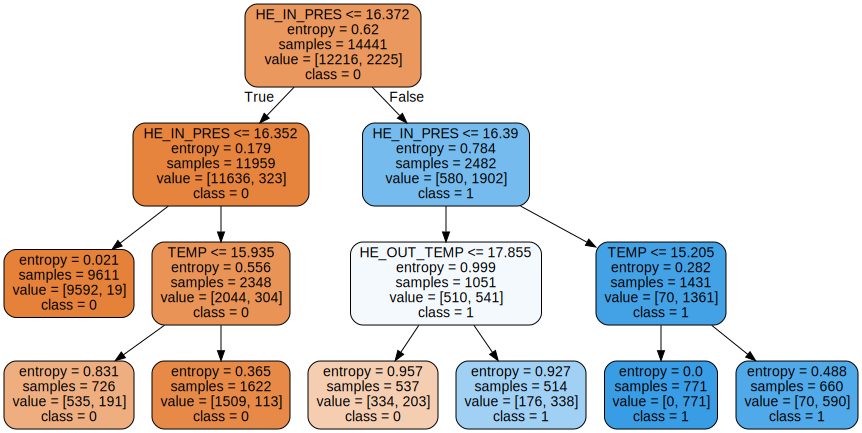

In [69]:
# SHOW GRAPHVIZ .dot FILE
dotFileOpen = open('./DecisionTree.dot')
dotFileRead = dotFileOpen.read()
dotDisplay = graphviz.Source(dotFileRead)
dotDisplay

#### 4.2.4. 의사결정트리 성능 평가

분류모델의 성능은 오분류표를 사용하여 다양한 평가지표를 계산함으로써 평가할 수 있습니다.  
오분류표로부터 정확도, 오분류율, 정밀도, 특이도, 재현율, F$_1$ 스코어를 산출하며, 이를 통해 모델을 평가합니다.  

In [72]:
# 분류모델 평가 함수 import
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # scikit-learn 패키지의 metrics 모듈 중 confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 함수를 import 합니다.
from sklearn.model_selection import    

In [73]:
#최적 하이퍼 파라미터 찾기
param={
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [3, 4, 5],
    "max_leaf_nodes" : [5, 6, 7, 8]
}

# 의사결정트리모델 구현
dtclf = DecisionTreeClassifier()
dtclf_G = GridSearchCV(dtclf, param_grid=param, cv=5, refit=True) 

# dtclf = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=100,
#                             min_samples_leaf=500, random_state=42)

dtclf_G.fit(trainx, trainy)
dtclf = dtclf_G.best_estimator_
dtclf

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8)

In [75]:
# 검증데이터를 사용한 랜덤포레스트 모델 예측
yhat = dtclf.predict(validx)

##### 4.2.4.1. 오분류표(Confusion Matrix)

오분류표는 분류기의 성능을 평가하는 좋은 방법으로, 아래 표와 같이 오분류표의 행은 실제 클래스를, 열은 예측 클래스를 나타냅니다.  
이러한 오분류표를 사용하게 되면, 분류 모델이 제대로 예측했는지를 쉽게 파악할 수 있으며, 아래의 평가지표를 계산하는데 사용됩니다.

||Predicted 0<br>Negative|Predicted 1<br>Positive|
|:-:|:-:|:-:|
|<B>True 0<br>Negative</B>|<B>TN ; True Negative</B><br>실제 : 0 예측 : 0<br>실제값이 0이며, 0으로 예측함|<B>FP ; False Positive</B><br>실제 : 0 예측 : 1<br>실제값이 0이며, 1로 예측함|
|<B>True 1<br>Positive</B>|<B>FN ; False Negative</B><br>실제 : 1 예측 : 0<br>실제값이 1이나, 0으로 예측함|<B>TP ; True Positive</B><br>실제 : 1 예측 : 1<br>실제값이 1이며, 1로 예측함|

오분류표는 Scikit-Learn 패키지의 confusion_matrix 함수를 사용하여 계산할 수 있으며, 다음과 같은 코드로 계산할 수 있습니다.   

***confusion_matrix(y_true, y_pred, labels=None)***

confusion_matrix 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  

- y_true : 실제값
- y_pred : 예측값
- lables : 오분류표의 행/열에 대한 이름

In [76]:
# 오분류표를 사용한 모델 평가
print ('confusion matrix')
pd.DataFrame(confusion_matrix(y_true=validy, y_pred=yhat), 
             columns = ['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

confusion matrix


,Predicted 0,Predicted 1
True 0,5258,57
True 1,193,682


위 오분류표는 다음과 같이 해석할 수 있습니다.

1. 실제 0을 0으로 예측한 경우 (TN) : 5258건
2. 실제 0을 1로 예측한 경우 (FP) : 57건
3. 실제 1을 0으로 예측한 경우 (FN) : 193건
4. 실제 1을 1로 예측한 경우 (TP) : 682건

이렇게 산출된 결과를 사용하여 아래 평가지표를 계산할 수 있습니다.

> confusion_matrix의 결과는 Numpy의 array 자료형으로 계산되나, 분석자가 이해하기 쉽도록 Pandas의 DataFrame 자료형으로 변환하였습니다.

##### 4.2.4.2. 정확도(Accuracy)와 오분류율(Error Rate)

정확도는 전체 분류 중 올바르게 분류한 경우을 나타내며 다음과 같이 계산할 수 있습니다.  
정확도는 모델의 예측값이 실제값과 얼마나 유사한지를 계산하게 되어 모델 자체의 성능을 평가할 수 있는 지표가 됩니다.

$$Accuracy = \frac{TP+TN}{TP+FN+FP+TN}$$

오분류율은 정확도와 반대로, 전체 분류 중 잘못 분류한 경우를 나타내며 다음과 같이 계산합니다.

$$Error Rate = 1 - Accuracy = \frac{FN+FP}{TP+FN+FP+TN}$$

정확도는 오분류표로부터 위와 같은 식을 통해 계산이 가능하지만, Scikit-Learn 패키지의 accuracy_score 함수를 사용하면 간단하게 계산할 수 있습니다.

***accuracy_score(y_true, y_pred)***

accuracy_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.

- y_true : 실제값
- y_pred : 예측값

In [77]:
# accuracy_score를 사용한 모델 평가
print ('Accuracy :', accuracy_score(y_true=validy, y_pred=yhat))

# 오분류표를 사용한 모델 평가
print ('confusion_matrix :', (5258 + 682) / (5258 + 57 + 193 + 682)) # 변경 필요

Accuracy : 0.9596122778675282
confusion_matrix : 0.9596122778675282


accuracy_score를 사용한 정확도는 오분류표의 각 값을 사용하여 계산한 결과와 동일한 것을 알 수 있습니다.

##### 4.2.4.3. 정밀도(Precision)와 특이도(Specificity)

정밀도는 1으로 예측한 전체 값 중에 실제값이 1인 비율을 나타내며 다음과 같이 계산할 수 있습니다.

$$Precision = \frac{TP}{TP+FP}$$

특이도는 반대로, 0로 예측한 전체 값 중에 실제값이 0인 비율을 나타내며 다음과 같이 계산할 수 있습니다.

$$Specificity = \frac{TN}{TN+FP}$$


정밀도를 사용함으로써 예측 모델이 얼마나 1인 값을 정확하게 예측하는지 확인할 수 있습니다.  
예를 들어 생산라인에서 나오는 불량품(1)을 찾아내는 문제일 경우, 정밀도를 높임으로써 많은 값들을 1로 예측하게 함으로써,  
더 나은 분류 모델을 구현할 수 있습니다.

예를 들어, 생산라인의 1차 자동 검수라인의 불량품/양품 판별 모델을 개발했다고 한다면, 다음과 같은 케이스가 발생할 수 있습니다.

1. 불량품을 불량품으로 예측한 경우
2. 양품을 불량품으로 예측한 경우
3. 불량품을 양품으로 예측한 경우
4. 양품을 양품으로 예측한 경우

이러한 케이스에서는 잘못 예측하는 2, 3번 케이스가 문제이나, 2차 이후 검수라인에서 불량품을 처리할 수 있으므로,  
양품을 불량품으로 예측하여 해당 상품을 제거하는 경우인 2번 케이스가 문제가 될 소지가 있습니다.  

이러한 경우, 정밀도를 사용함으로써 실제 양품인 경우 양품으로 예측할 확률을 높이는 쪽으로 모델을 개선할 필요가 있습니다.

정확도와 유사한 개념이지만, 정확도는 모든 예측 값에 대해 실제 값과 일치할 확률이라면,  
정밀도는 1로 예측된 전체 값 중에서 실제 1값과 일치할 확률을 찾는 것이 다릅니다.


정밀도는 오분류표로부터 위와 같은 식을 통해 계산이 가능하지만, Scikit-Learn 패키지의 precision_score 함수를 사용하면 간단하게 계산할 수 있습니다.

***precision_score(y_true, y_pred, labels=None, average='binary', zero_division='warn')***

precision_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.

- y_true : 실제값
- y_pred : 예측값
- labels : 이진 분류가 아닌 경우 사용할 라벨
- average : 다중 분류의 경우 평균화 방법 선택
- zero_division : 0으로 나눌 지 선택하며, 1로 선택할 경우 1로 반환

In [78]:
# precision_score 사용한 모델 평가
print ('Precision :', precision_score(y_true=validy, y_pred=yhat))

# 오분류표를 사용한 모델 평가
print ('confusion_matrix :', (682) / (682 + 57)) # 변경 필요

Precision : 0.9228687415426252
confusion_matrix : 0.9228687415426252


precision_score를 사용한 정밀도는 오분류표의 각 값을 사용하여 계산한 결과와 동일한 것을 알 수 있습니다.

##### 4.2.4.4. 재현율(Recall)과 민감도(Sensitivity)

재현율(민감도)은 실제값이 1인 값 중에 1으로 예측한 비율을 나타내며 다음과 같이 계산할 수 있습니다.

$$Recall = Sensitivity = \frac{TP}{TP+FN}$$

예를 들어, 공정의 이상 판별 모델을 개발했다고 한다면, 다음과 같은 케이스가 발생할 수 있습니다.

1. 공정이 이상인 경우, 이상으로 예측한 경우
2. 공정이 정상인 경우, 이상으로 예측한 경우
3. 공정이 이상인 경우, 정상으로 예측한 경우
4. 공정이 정상인 경우, 정상으로 예측한 경우

이러한 케이스에서는 잘못 예측하는 2, 3번 케이스가 문제이며 그 중에서도 공정이 이상인 경우인데 정상으로 예측하는 3번 케이스가 가장 큰 문제가 됩니다.  
이러한 경우, 재현율을 사용함으로써 실제 이상인 경우에서 이상으로 예측한 확률을 높이는 쪽으로 모델을 개선할 필요가 있습니다.  

재현율은 오분류표로부터 위와 같은 식을 통해 계산이 가능하지만, Scikit-Learn 패키지의 recall_score 함수를 사용하면 간단하게 계산할 수 있습니다.

***recall_score(y_true, y_pred, labels=None, average='binary', zero_division='warn')***

recall_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.

- y_true : 실제값
- y_pred : 예측값
- labels : 이진 분류가 아닌 경우 사용할 라벨
- average : 다중 분류의 경우 평균화 방법 선택
- zero_division : 0으로 나눌 지 선택하며, 1로 선택할 경우 1로 반환

In [79]:
# recall_score 사용한 모델 평가
print ('Recall :', recall_score(y_true=validy, y_pred=yhat))

# 오분류표를 사용한 모델 평가
print ('confusion_matrix :', (682) / (682 + 193))  # 변경 필요

Recall : 0.7794285714285715
confusion_matrix : 0.7794285714285715


recall_score 사용한 재현율은 오분류표의 각 값을 사용하여 계산한 결과와 동일한 것을 알 수 있습니다.

위의 정밀도와 재현율은 모두 TP를 높이는 데 초점을 두나, 재현율은 FN, 정밀도는 FP를 낮추는 데 좀 더 초점을 둔다는 차이점이 있습니다.  
가장 좋은 경우는 정밀도와 재현율 모두 높은 수치를 얻는 것이지만, 두 지표는 상호 보완적인 역할을 하므로 하나의 지표를 올리면 반대의 지표가 내려가게 됩니다.  
이를 정밀도-재현율 Trade-off라고 합니다.

두 지표를 모두 고려하여 모델을 평가하고자 하는 경우, F$_1$ 스코어를 사용할 수 있습니다.

##### 4.2.4.5. F$_1$ 스코어

F$_1$ 스코어는 정밀도와 재현율의 조화평균으로 다음과 같이 계산할 수 있습니다.

$$F_1 Score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = \frac{TP}{TP + \frac{FN+FP}{2}}$$

정밀도와 재현율의 조화평균으로 계산된 F$_1$ 스코어는 두 지표를 하나의 값으로 나타내어 두개 이상의 분류기를 비교하는데 사용할 수 있습니다.  
정밀도와 재현율이 비슷한 분류기의 경우 F$_1$ 스코어가 높으나, 상황에 따라서는 정밀도나 재현율이 더 중요한 지표가 될 수 있습니다.  

F$_1$ 스코어는 오분류표로부터 위와 같은 식을 통해 계산이 가능하지만, Scikit-Learn 패키지의 f1_score 함수를 사용하면 간단하게 계산할 수 있습니다.

***f1_score(y_true, y_pred, labels=None, average='binary', zero_division='warn')***

f1_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.

- y_true : 실제값
- y_pred : 예측값
- labels : 이진 분류가 아닌 경우 사용할 라벨
- average : 다중 분류의 경우 평균화 방법 선택
- zero_division : 0으로 나눌 지 선택하며, 1로 선택할 경우 1로 반환

In [80]:
# f1_score 사용한 모델 평가
print ('F1 Score :', f1_score(y_true=validy, y_pred=yhat))

# 오분류표를 사용한 모델 평가
print ('confusion_matrix :', (682) / (682 + ((193 + 57) / 2)))  

F1 Score : 0.8451053283767039
confusion_matrix : 0.8451053283767038


f1_score을 사용한 F$_1$ 스코어는 오분류표의 각 값을 사용하여 계산한 결과와 동일한 것을 알 수 있습니다.

## 5. ROC Curve와 AUC

### 5.1. ROC Curve(Receiver Operating Characteristic)

ROC Curve는 모델의 성능 평가를 위해 사용되며, ROC Curve의 X축과 Y축에는 각각 FPR이라는 값과 TPR이라는 값을 두게 됩니다.  
이 FPR과 TPR의 변화를 그래프로 시각화 한 것입니다.  

- FPR(False Positive Rate) : 1-특이도로 계산할 수 있으며, 실제로 1인 값 중에 0으로 잘못 예측한 비율

$$FPR = \frac{FP}{FP+TN}$$

- TPR(True Positive Rate) : 재현율(민감도)으로, 실제값이 1인 값 중에 1으로 예측한 비율

$$TPR = \frac{TP}{TP+FN}$$


곡선이 왼쪽 위 모서리에 가까울수록 모델의 성능이 높다고 평가할 수 있으며, TPR이 크고, FPR이 작을수록 좋은 모델로 평가합니다.  
Scikit-Learn 패키지의 roc_curve 함수를 사용하면, FPR과 TPR을 쉽게 계산할 수 있으며, 다음과 같이 사용할 수 있습니다.   

***roc_curve(y_true, y_score)***

roc_curve 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  

- y_true : 실제값
- y_score : 모델이 1로 예측할 확률

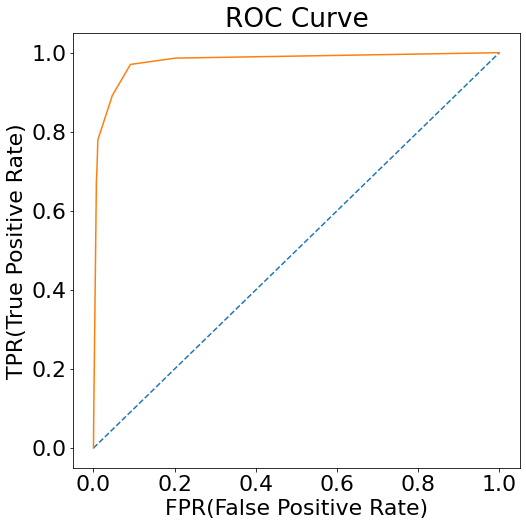

In [82]:
# ROC Curve import
from sklearn.metrics import roc_curve # scikit-learn 패키지의 metrics 모듈 중 roc_curve 함수를 import 합니다.

# 의사결정트리 모델에 검증데이터를 사용했을 때 1로 예측할 확률
yproba = dtclf.predict_proba(validx)[:,1]

# FPR, TPR 산출
fpr, tpr, _ = roc_curve(validy, yproba)

# ROC Curve 그래프 표출
plt.figure(figsize=(8, 8))
ax = sns.lineplot(x=[0, 1], y=[0, 1])
ax.lines[0].set_linestyle("--")

sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')
plt.show()

### 5.2. AUC(Area Under the Curve)

ROC Curve를 사용하면 곡선을 통해 모델의 성능을 평가할 수 있습니다.  
하지만, 대부분의 경우 모델의 성능이 얼마나 좋은지에 대한 비교를 하기엔 적합하지 않습니다.  
AUC는 곡선 아래의 면적을 사용하여 성능을 지표로 나타내며, 완벽한 분류모델의 경우 AUC가 1이며, 완전한 랜덤 분류모델의 경우 0.5 입니다.

Scikit-Learn 패키지의 roc_auc_score 함수를 사용하면, FPR과 TPR을 쉽게 계산할 수 있으며, 다음과 같이 사용할 수 있습니다.   

***roc_auc_score(y_true, y_score)***

roc_auc_score 함수에 사용할 수 있는 주요 파라미터는 다음과 같은 기능을 하고있습니다.  

- y_true : 실제값
- y_score : 모델이 1로 예측할 확률

In [86]:
# AUC SCORE import
from sklearn.metrics import roc_auc_score # scikit-learn 패키지의 metrics 모듈 중 roc_auc_score 함수를 import 합니다.

# 의사결정트리 모델에 검증데이터를 사용했을 때 1로 예측할 확률
yproba = dtclf.predict_proba(validx)[:,1]

# AUC SCORE 산출
AUC  = roc_auc_score(validy, yproba)
print ('AUC :', AUC)

AUC : 0.9775412982126058


위와 같이 ROC Curve와 AUC를 사용하면 모델의 성능을 그래프로 표출하거나 지표로 평가할 수 있습니다.  